# Day 3: Conv basics

## CNN basics

In [1]:
import tensorflow as tf

In [2]:
#Creating an image
img = tf.random.uniform([1,28,28,1])
img.shape #Getting the

TensorShape([1, 28, 28, 1])

In [5]:
#Creating a conv layer
conv = tf.keras.layers.Conv2D(10, kernel_size = 3, padding = "valid", strides = 1)
out = conv(img)

In [6]:
out.shape

TensorShape([1, 26, 26, 10])

In [7]:
#Checking the weight of the layer
conv.weights[0].shape

TensorShape([3, 3, 1, 10])

### Pooling Layer

In [9]:
pool = tf.keras.layers.MaxPool2D()
pool(img).shape

TensorShape([1, 14, 14, 1])

In [10]:
pool.weights

[]

## CNN Arch Example (1)

In [11]:
#import needed libraries
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
#Loading and splitting the data from keras built in dataset (fashion)
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
#slicing the dataset to train and test
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [14]:
#Define a function to process the image
def process_img(x,y):
  x = x/255
  return x,y

In [15]:
dataset = dataset.map(process_img)

In [16]:
dataset = dataset.batch(32)

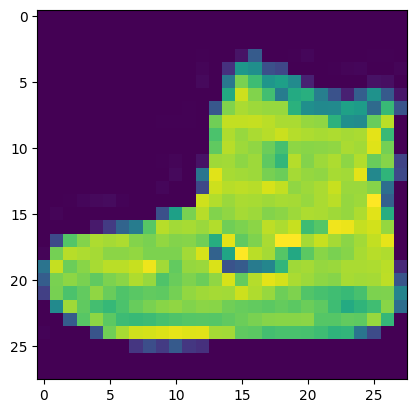

In [17]:
for i in dataset.take(1):
  img = i[0][0]
  plt.imshow(img)
  break

In [18]:
dataset = dataset.shuffle(1000)

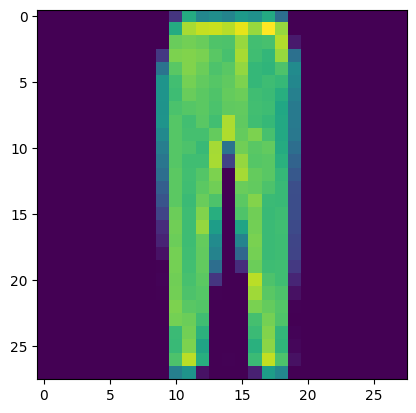

In [19]:
for i in dataset.take(1):
  img = i[0][0]
  plt.imshow(img)
  break

## Build the CNN:

In [20]:
model = keras.models.Sequential([
        keras.Input(shape=[28, 28, 1]),

        # CNN block 1
        keras.layers.Conv2D(filters=64, kernel_size=7, padding="SAME", activation='relu'),
        keras.layers.MaxPooling2D(pool_size=2),

        # CNN block 2
        keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),

        # CNN block 3
        keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
        keras.layers.MaxPooling2D(pool_size=2),

        # CNN block 4
        keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),

        # CNN block 5
        keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding="SAME"),
        keras.layers.MaxPooling2D(pool_size=2),

        # Dense (Fully Connceted Layers)
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(units=10, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 256)         2

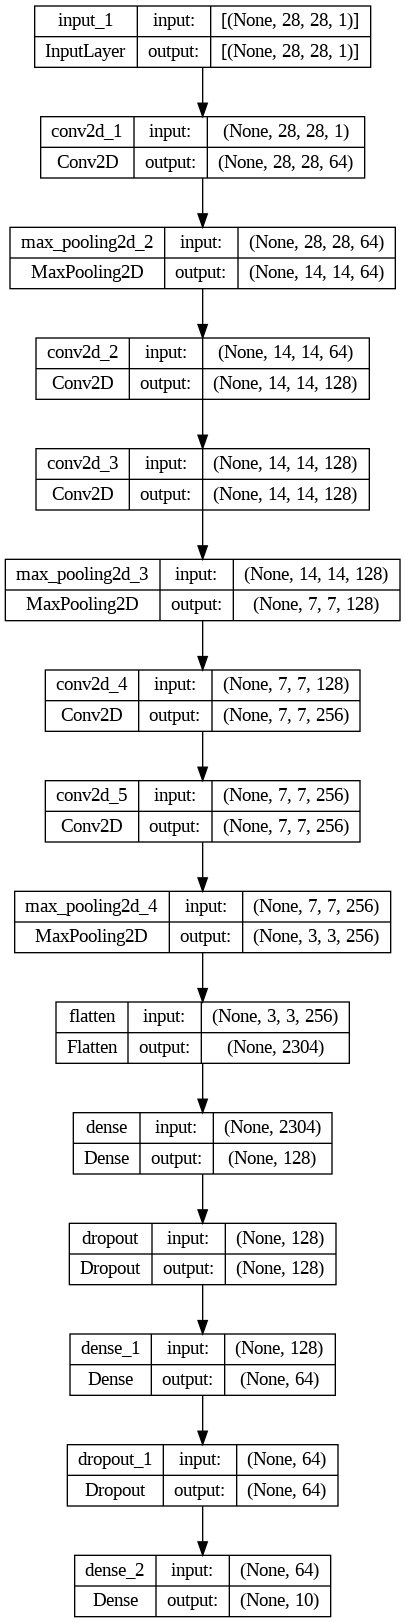

In [22]:
keras.utils.plot_model(model, show_shapes= True)

### Compile the model

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

### Train the model

In [25]:
history = model.fit(dataset, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10
 537/1719 [========>.....................] - ETA: 9:43 - loss: 1.0240 - accuracy: 0.6241

KeyboardInterrupt: ignored

### Plot the learning curve

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## CNN Arch Example (2) - With Callback

In [27]:
#as continuation to the previous code with adding a callback

In [28]:
# add callback
cb = [
    tf.keras.callbacks.TensorBoard(log_dir='/root/deep_learning_bootcamp/tfboard_logs'),
    tf.keras.callbacks.EarlyStopping(patience=2),
]

In [29]:
history = model.fit(dataset,
                    epochs=1000,
                    validation_data=(X_valid, y_valid),
                    callbacks=cb)

Epoch 1/1000
  28/1719 [..............................] - ETA: 14:29 - loss: 0.7071 - accuracy: 0.7556

KeyboardInterrupt: ignored

## CNN Image classififcation

In [2]:
#import important Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Neural Network Imports
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [3]:
#Loading the data
cf10 = tf.keras.datasets.cifar10

In [4]:
cf10

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

In [5]:
(x_train, y_train), (x_test, y_test) = cf10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

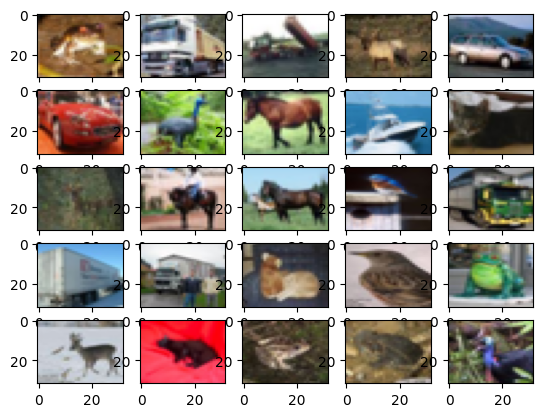

In [7]:
#Visualising the data
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

In [8]:
# Get number of classes, to be used for output layer
K = np.unique(y_train).shape[0]

#Get the shape
x_train.shape

(50000, 32, 32, 3)

In [9]:
# Build the model using the functional API

# input layer
i = Input(shape=[32, 32, 3])

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# Output Layer
x = Dense(K, activation='softmax')(x)

In [10]:
#
model = Model(inputs=i, outputs=x)

In [11]:
#Get the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

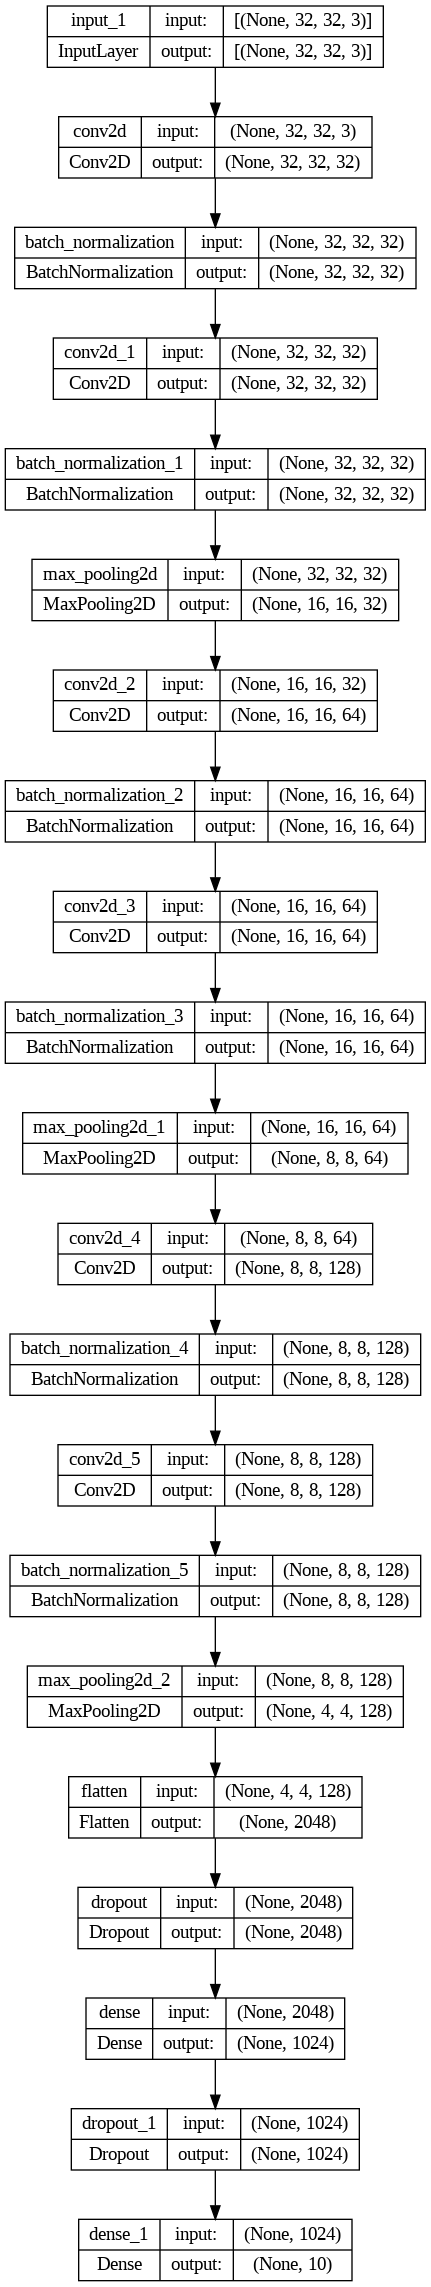

In [12]:
#Visualise the model
tf.keras.utils.plot_model(model, show_shapes= True)

In [13]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#fit the model
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 27s 8ms/step - loss: 1.3403 - accuracy: 0.5364 - val_loss: 1.0706 - val_accuracy: 0.6246
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8675 - accuracy: 0.7002 - val_loss: 1.0277 - val_accuracy: 0.6387
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7074 - accuracy: 0.7562 - val_loss: 0.8251 - val_accuracy: 0.7318
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6004 - accuracy: 0.7941 - val_loss: 0.6746 - val_accuracy: 0.7748
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5078 - accuracy: 0.8274 - val_loss: 0.6388 - val_accuracy: 0.7921
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4370 - accuracy: 0.8504 - val_loss: 0.6458 - val_accuracy: 0.7942
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3713 - accuracy: 0.8724 - val_loss: 0.6405 - val_ac

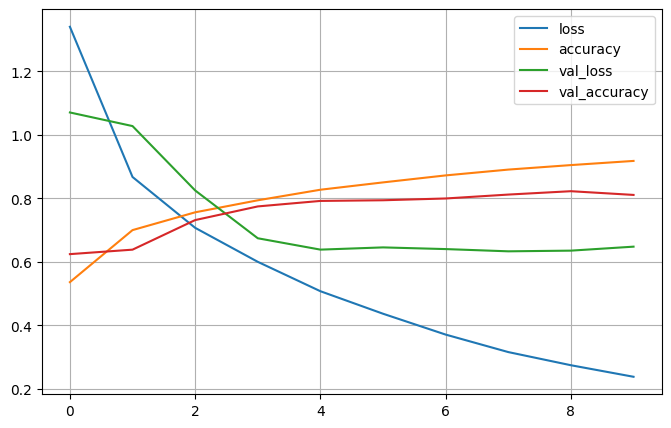

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
# save model
model.save("model.h5")

## TF Data API - Example (1)

In [16]:
import tensorflow as tf

In [17]:
X = tf.range(20)
X

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)>

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(X)
for i in dataset:
  print(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)


In [20]:
dataset = dataset.map(lambda x: x * 2)

In [21]:
list(dataset.take(1).as_numpy_iterator())

[0]

In [22]:
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)

In [23]:
#Reading input files
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images[0].max()

4422102/4422102 [==============================] - 1s 0us/step


255

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
i = list(dataset.take(1).as_numpy_iterator())
i[0][0].max()

255

In [25]:
dataset_2 = dataset.map(
    lambda x, y: (x/255, y)

)

i = list(dataset_2.take(1).as_numpy_iterator())
i[0][0].max()

1.0

In [26]:
 dataset = dataset.shuffle(20)

In [27]:
def gen_test():
  for i in range(100):
    yield i

In [28]:
dataset = tf.data.Dataset.from_generator(gen_test, output_types=tf.int32, output_shapes = ())

dataset = dataset.repeat().batch(10)

for i in dataset.take(2):
    print(i)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([10 11 12 13 14 15 16 17 18 19], shape=(10,), dtype=int32)


In [29]:
#Load image from a directory
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [30]:
#Disaplay file
flowers

'/root/.keras/datasets/flower_photos'

In [31]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [32]:
img_dataset = img_gen.flow_from_directory(flowers)

Found 3670 images belonging to 5 classes.


In [33]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [34]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [35]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3], [32,5])
)

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [36]:
 for images, labels in ds.take(1):
  print('images.shape: ', images.shape)
  print('labels.shape: ', labels.shape)

Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


Found 3670 images belonging to 5 classes.


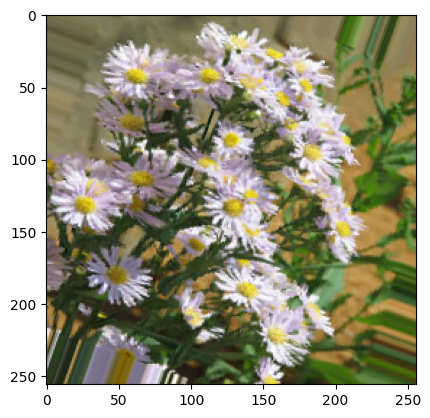

In [37]:
from matplotlib import pyplot as plt

i = list(ds.take(1).as_numpy_iterator())[0][0]

plt.imshow(i[9])

## TF Data API - Example (2)

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

In [39]:
(train_image, train_label), (test_image, test_label) = load_data()

In [40]:
def shuffle_generator(image, label, seed):
  idx = np.arange(len(image))
  np.random.default_rng(seed).shuffle(idx)
  for i in idx:
    yield image[i], label[i]

In [41]:
dataset = tf.data.Dataset.from_generator(
    shuffle_generator,
    args=[train_image, train_label, 42],
    output_signature=(
        tf.TensorSpec(shape=(28,28), dtype=tf.uint8),
        tf.TensorSpec(shape=(), dtype=tf.uint8)))

In [42]:
 model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="sigmoid")
])

In [43]:
model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy)

In [44]:
history = model.fit(dataset.batch(32),
                    epochs=5,
                    validation_data=(test_image, test_label))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 2.1905 - val_loss: 0.7800
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6858 - val_loss: 0.7460
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6002 - val_loss: 0.6206
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5497 - val_loss: 0.5509
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4977 - val_loss: 0.4938


In [45]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.4938


0.49375805258750916

# Day 4: RNN

## RNN basics

In [46]:
#import important libraries
import tensorflow as tf

In [47]:
#Create a dataset
X = tf.random.uniform(shape=[50,20,5])

In [50]:
#Create RNN model using simpleRNN
rnn = tf.keras.layers.SimpleRNN(64)
out = rnn(X)

In [51]:
rnn.weights[0].shape, rnn.weights[1].shape, rnn.weights[2].shape

(TensorShape([5, 64]), TensorShape([64, 64]), TensorShape([64]))

In [52]:
#Using GRU & LSTM
gru = tf.keras.layers.LSTM(38)
out_gru = gru(X)

In [53]:
gru.weights[0].shape, gru.weights[1].shape, gru.weights[2].shape

(TensorShape([5, 152]), TensorShape([38, 152]), TensorShape([152]))

## LTSM Example (1)

In [ ]:
# inspired and data from: kaggle.com/code/shivamb
# https://www.kaggle.com/datasets/aashita/nyt-comments?resource=download

In [57]:
!pip install tensorflow
!pip install keras
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [60]:
#import important libraries
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt

In [ ]:
files_list = glob.glob("./NY_data/Ar*")

In [ ]:
files_list

In [ ]:
corpus = []
for file in files_list:
    _df = pd.read_csv(file)
    corpus.extend(list(_df["headline"].values))

In [ ]:
corpus[:25]

In [ ]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

input_sequences, total_words = get_sequence_of_tokens(corpus)
input_sequences[:10]

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
X, y = input_sequences[:,:-1],input_sequences[:,-1]

y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [ ]:
input_len = max_sequence_len - 1

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=total_words, output_dim=10, input_length=input_len))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

In [ ]:
hist = model.fit(X, y, epochs=100, callbacks=cb)

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
#Saving the model
model.save("./txt_gen.h5")

In [ ]:
#Define a function to generate text
def generate_text(seed_txt, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_txt])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted)

        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_txt += " " + output_word
    print(seed_txt)

In [ ]:
#generated text example 1
generate_text("united states", 5, model, max_sequence_len)

#generatd text example 2
generate_text("New", 5, model, max_sequence_len)

#generated text example 3
generate_text("there was", 10, model, max_sequence_len)

## LTSM Example (2) - Sentiment

In [61]:
# dataset: https://media.githubusercontent.com/media/deephaven/examples/main/Sentiment/csv/sentiment.csv

In [62]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [64]:
dataset = pd.read_csv("media.githubusercontent.com_media_deephaven_examples_main_Sentiment_csv_sentiment.csv")

In [65]:
dataset.head(3)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN


In [66]:
dataset.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [68]:
df_1 = dataset[["text","sentiment"]].copy()
df_1["sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [69]:
df_1.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [70]:
#Tokenisation
max_features = 2000
token = Tokenizer(num_words= max_features, split=" ")
token.fit_on_texts(df_1["text"].values)

X = token.texts_to_sequences(df_1["text"].values)
token.index_word

{1: 'gopdebate',
 2: 'the',
 3: 'rt',
 4: 'gopdebates',
 5: 'to',
 6: 't',
 7: 'co',
 8: 'of',
 9: 'is',
 10: 'a',
 11: 'http',
 12: 'and',
 13: 'i',
 14: 'in',
 15: 'rwsurfergirl',
 16: 'you',
 17: 'for',
 18: 'trump',
 19: '🇺🇸',
 20: 'it',
 21: 'on',
 22: 'that',
 23: 'fox',
 24: 'this',
 25: 'not',
 26: 'was',
 27: 'about',
 28: 'debate',
 29: 'realdonaldtrump',
 30: 'amp',
 31: 'from',
 32: 'at',
 33: 'news',
 34: 'https',
 35: 'last',
 36: 'we',
 37: 'have',
 38: 'be',
 39: 'candidates',
 40: 'me',
 41: 'are',
 42: 'but',
 43: 'he',
 44: 'just',
 45: '…',
 46: 'they',
 47: 'so',
 48: 'like',
 49: 'with',
 50: 'what',
 51: 'who',
 52: 'up',
 53: 'gop',
 54: 'my',
 55: 'all',
 56: 'megynkelly',
 57: 'night',
 58: 'how',
 59: 'people',
 60: 'if',
 61: 'as',
 62: "don't",
 63: 'foxnews',
 64: 'has',
 65: 'jeb',
 66: 'bush',
 67: 'no',
 68: 'one',
 69: 'do',
 70: 'by',
 71: 'when',
 72: 'should',
 73: 'out',
 74: 'their',
 75: 'can',
 76: 'would',
 77: 'think',
 78: 'will',
 79: 'more'

In [71]:
[i.__len__() for i in X[:10]]

[14, 22, 12, 20, 18, 18, 23, 9, 17, 11]

In [72]:
X[0].__len__(), df_1.iloc[0]["text"].split(" ").__len__()

(14, 15)

In [73]:
X = pad_sequences(X)
[i.__len__() for i in X[:10]]

[29, 29, 29, 29, 29, 29, 29, 29, 29, 29]

In [74]:
#Setting target (y)
y = y = pd.get_dummies(df_1["sentiment"]).values

In [75]:
#Display y
y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [76]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))
list(dataset.take(1).as_numpy_iterator())

[(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    3,   58,   86,  343,  462,   27,    2,
          421,  377,  103,   35,   57, 1045,    1], dtype=int32),
  array([0, 1, 0], dtype=uint8))]

In [77]:
for i in dataset.take(1):
    break

i[0].shape

TensorShape([29])

In [78]:
dataset = dataset.batch(32)

len(list(dataset))

434

In [79]:
train_dataset = dataset.take(400)
test_dataset = dataset.skip(400)

len(list(train_dataset)), len(list(test_dataset))

(400, 34)

In [81]:
#Builiding the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=[29]))
model.add(tf.keras.layers.Embedding(
    input_dim=token.word_counts.__len__(),
    output_dim=64,
    input_length=29
))
model.add(tf.keras.layers.LSTM(200, return_sequences=True))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [82]:
#Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 64)            1251392   
                                                                 
 lstm_1 (LSTM)               (None, 29, 200)           212000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               120400    
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,584,095
Trainable params: 1,584,095
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Create a callback for debugging
cb = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),
    tf.keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1, write_graph=True, embeddings_freq=1, embeddings_metadata="./logs")
]

In [85]:
#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.categorical_crossentropy)

In [87]:
#Fit the model
model.fit(dataset,
          validation_data=test_dataset,
          epochs=10,
          callbacks=cb)

Epoch 1/10
434/434 [==============================] - 4s 8ms/step - loss: 0.3251 - val_loss: 0.3763
Epoch 2/10
434/434 [==============================] - 4s 9ms/step - loss: 0.3163 - val_loss: 0.3759
Epoch 3/10
434/434 [==============================] - 4s 8ms/step - loss: 0.3091 - val_loss: 0.3649
Epoch 4/10
434/434 [==============================] - 4s 9ms/step - loss: 0.3005 - val_loss: 0.3648
Epoch 5/10
434/434 [==============================] - 4s 9ms/step - loss: 0.2945 - val_loss: 0.3584
Epoch 6/10
434/434 [==============================] - 4s 8ms/step - loss: 0.2809 - val_loss: 0.3523
Epoch 7/10
434/434 [==============================] - 4s 9ms/step - loss: 0.2804 - val_loss: 0.3501
Epoch 8/10
434/434 [==============================] - 4s 9ms/step - loss: 0.2720 - val_loss: 0.3428
Epoch 9/10
434/434 [==============================] - 4s 8ms/step - loss: 0.2510 - val_loss: 0.3352
Epoch 10/10
434/434 [==============================] - 4s 10ms/step - loss: 0.2389 - val_loss: 0.331

In [89]:
token.word_docs.keys()

dict_keys(['the', 'night', 'nancyleegrahn', 'feel', 'how', 'gopdebate', 'change', 'question', 'rt', 'last', 'did', 'everyone', 'climate', 'exactly', 'about', 'catch', 'are', '90', 'some', 'in', 'best', 'of', 'co', 'full', 't', 'http', "didn't", "scott's", 'walker16', 'here', 'seconds', 'lines', 'zsff…', 'scottwalker', 'was', 'and', 'rice', 'no', 'held', 'mention', 'tamir', 'cleveland', 'wow', 'tjmshow', 'on', 'after', 'any', 'hours', 'that', 'carly', 'above', 'fiorina', 'says', 'trending', 'is', '…', 'men', 'just', 'completed', 'her', 'robgeorge', "she's", 'debate', 'debates', 'history', 'ratings', 'realdonaldtrump', 'highest', 'trump2016', 'presidential', 'co…', 'delivered', 'danscavino', 'w', 'action', 'tx', 'tedcruz', 'my', 'will', 'barack', 'every', 'day', 'foxnews', 'taken', 'illegal', 'i', 'gregabbott', 'by', 'first', 'rescind', 'obama', 'executive', 'be', 'https', 'to', 'happy', 'warriorwoman91', 'when', 'not', 'anymore', 'megynkelly', 'moderator', 'heard', 'going', 'liked', 'sh

In [90]:
model.evaluate(test_dataset)

34/34 [==============================] - 0s 5ms/step - loss: 0.3316


0.3316311836242676

In [ ]:
#Saving the model (H5 - only saves the weights)
model.save("sentiment_model.h5")